<a href="https://colab.research.google.com/github/gibeom92/dispersion_PINN/blob/master/1D_dispersion_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import quad

In [ ]:
L = 10  # Length/2 of domain
dx = 0.1
dt = 0.01
T = 0.1

K = 5   # diffusion coefficient
u = 5   # wind profile

In [ ]:
x = np.arange(-L, L, dx)  # Define x domain
t = np.arange(0,T,dt)
n = np.arange(1,501,1)  # fourier series for solution

In [ ]:
# calculate the coefficient
d = np.zeros((len(n)))
e = np.zeros((len(n)))

for i in n:
  f_d = lambda a: 1/np.cosh(10 * a) * np.exp(-u/(2*K) * a)*np.sin(i*np.pi/L*a)
  d[i-1] = quad(f_d,-10,10,epsabs=0,limit=1000)[0]
  f_e = lambda a: 1/np.cosh(10 * a) * np.exp(-u/(2*K) * a)*np.cos((2*i-1)/2*np.pi/L*a)
  e[i-1] = quad(f_e,-10,10,epsabs=0,limit=1000)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if __name__ == '__main__':


In [ ]:
C = np.zeros((len(t),len(x)))

for i in t:
  for j in x:
    A = np.exp(u/(2*K) * (j-u/2*i))

    B = 0
    for m in n:
      D = 1/L * d[m-1] * np.exp(-K * (m*np.pi/L)**2 * i) * np.sin(m*np.pi/L * j)
      E = 1/L * e[m-1] * np.exp(-K * ((2*m-1)/2*np.pi/L)**2 * i) * np.cos((2*m-1)/2*np.pi/L * j)
      B += D + E

    C[int((i-t[0])/dt),int((j-x[0])/dx)] = A * B

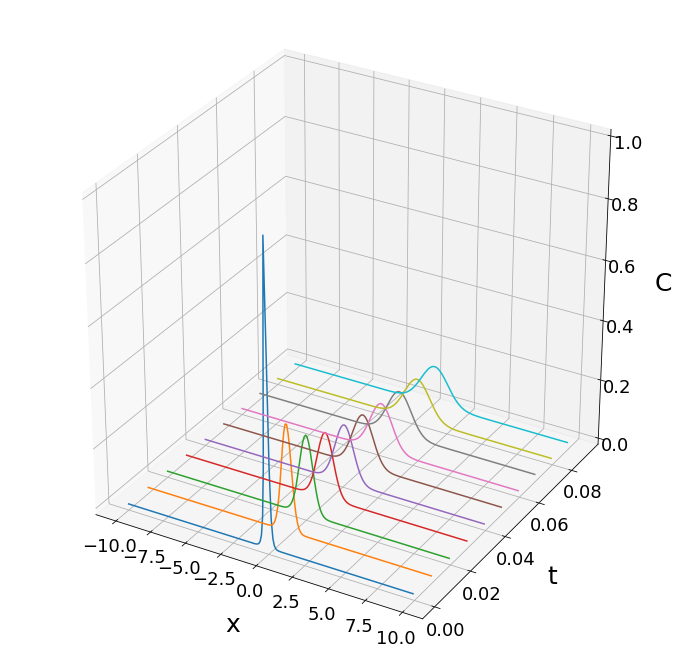

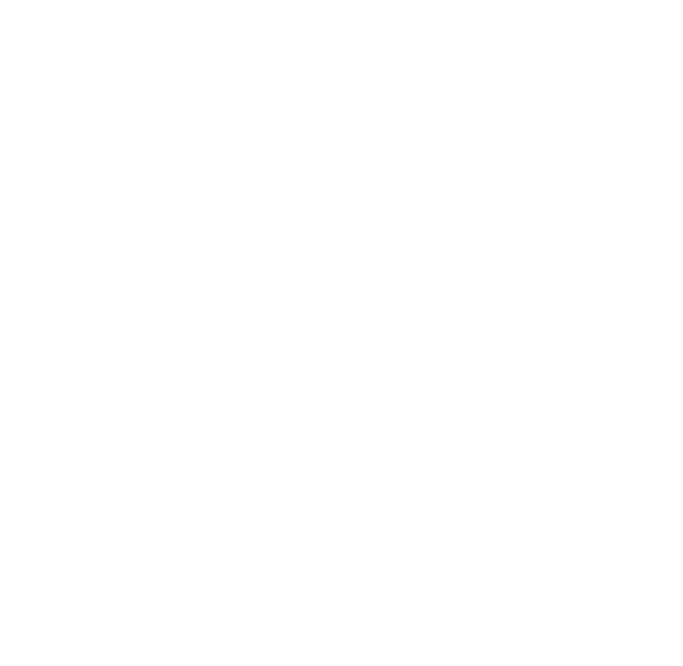

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})
fsize = 25

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

C_plot = C
for j in range(C_plot.shape[0]):
    ys = j * np.ones(C_plot.shape[1]) * dt
    ax.plot(x, ys, C_plot[j, :])
    ax.set_xlabel('x', size=fsize, labelpad=20)                                
    ax.set_ylabel('t', size=fsize, labelpad=20)                            
    ax.set_zlabel('C', size=fsize, labelpad=20)  

# Image plot
plt.figure()
#plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.DataFrame(C_plot)
df.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/Dispersion/analytic.xlsx')